In [9]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, ConstantKernel
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
import os
import shutil

In [147]:
mm1 = 200
mm2 = 200
a0 = 0.0
a1 = -1.0
b0 = 0.3
b1 = 0.5
b = np.arange(a0, a1, (a1-a0)/mm1)
d = np.arange(b0, b1, (b1-b0)/mm2)
B, D = np.meshgrid(b, d)
n, m = B.shape

실측 IV 3차원 플롯

In [13]:
nexp = 14
xyz = np.zeros((nexp, 200, 200))
for jter in range(nexp):
    fname_accum = '/Users/namkim/testAI/data_iv/data_' + str(jter+1) + '.txt'
    #fname_accum = 'data_iv_' + str(jter+1) + '.txt'
    x = []
    y = []
    z = []
    afile = open(fname_accum, 'r')
    for line in afile:
        y.append(float(line.split()[0]))
        x.append(float(line.split()[1]))
        z.append(float(line.split()[2]))
    afile.close()
    z = np.array(z)
    x = np.array(x)
    y = np.array(y)
    xx = np.zeros((200, 200))
    yy = np.zeros((200, 200))
    zz = np.zeros((200, 200))
    k = 0
    for i in range(200):
        for j in range(200):
            xx[i, j] = x[k]
            yy[i, j] = y[k]
            zz[i, j] = z[k]
            k = k+1
    if False:
        print(len(z))
    #xyz[jter, :, :] = xx[:, :]
    #xyz[jter, :, :] = yy[:, :]
    xyz[jter, :, :] = zz[:, :]
# print("모든 층의 처음 3x7 부분:")
# print(xyz[:, :3, :7])

#selected for manuscript, surface_IV measure, 10elev 100azim


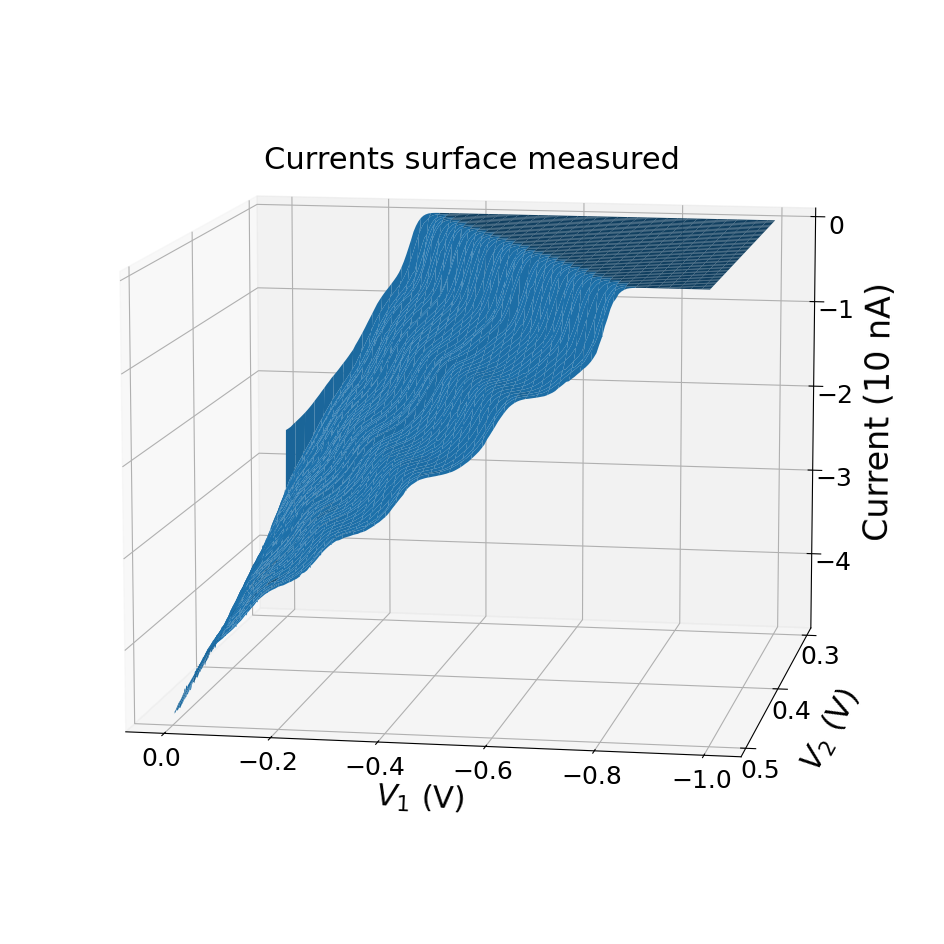

In [297]:
#selected for manuscript
import matplotlib.pyplot as plt
import numpy as np

print('#selected for manuscript, surface_IV measure, 10elev 100azim')
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(B, D, xyz[2, :, :])
ax.view_init(elev=10., azim=100.)

plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
ax.set_zlabel('Current (10 nA)', fontsize=24, rotation=0, labelpad=16)
plt.title('Currents surface measured', 
          fontsize=22,        # Font size
          pad=0,            # Vertical spacing between title and plot (in points)
          y=0.9,           # Vertical position (1.0 is at the top of the plot)
          x=0.5)            

# Set y-axis tick frequency
#y_ticks = np.linspace(D.min(), D.max(), 2)
y_ticks = np.linspace(0.3, 0.5, 3)
ax.set_yticks(y_ticks)

# Adjust tick label size and pad
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.tick_params(axis='z', labelsize=18)
ax.xaxis.set_tick_params(pad=0)
ax.xaxis.labelpad = 10
ax.yaxis.set_tick_params(pad=0)
ax.yaxis.labelpad = 10

plt.savefig('fig_iv_surface_10elev 100azim' + str() + '.pdf')
plt.show()
plt.close()


실측 표준편차 계산; (실측-실측평균)^2,  tmp[iexp, :, :] = (xyz[iexp, :, :]-zavgexpij[:, :])**2

In [33]:
# Create array for averages on xyz
zavgexpij = np.zeros((200, 200))  # 2D array since we're averaging across experiments
nexp = 14

# Calculate average using sum()
for i in range(200):
    for j in range(200):
        zavgexpij[i, j] = sum(xyz[:, i, j])/nexp  # Using sum() instead of np.mean()

# print('\nzavgexpij array (first 3 rows x 4 columns):')
# print(zavgexpij[:3, :4])

In [35]:
#calculus for variance of knn
tmp = np.zeros((nexp, 200, 200))
for iexp in range(nexp):
    tmp[iexp, :, :] = (xyz[iexp, :, :]-zavgexpij[:, :])**2
# print('tmp[:, :3, :4]')
# print(tmp[:, :3, :4])
varexpij = np.zeros((200, 200))
for i in range(200):
    for j in range(200):
        varexpij[i, j] = sum(tmp[:, i, j])/nexp
# print('varexpij[:3, :4]')
# print(varexpij[:3, :4])

In [37]:
nexp=14
tmp = np.zeros((nexp, 200, 200))
for iexp in range(3):
    tmp[iexp, :, :] = ((xyz[iexp, :, :]-zavgexpij[:, :]))**2
savgexpij = np.zeros((200, 200))
for i in range(200):
    for j in range(200):
        savgexpij[i, j] = np.sqrt(sum(tmp[:, i, j])/nexp)
# print('savgexpij[[:3,:4]')
# print(savgexpij[:3,:4])
# print('savgexpij[197:199,197:199]')
# print(savgexpij[197:199,197:199])

standard deviation (savgexpij), default


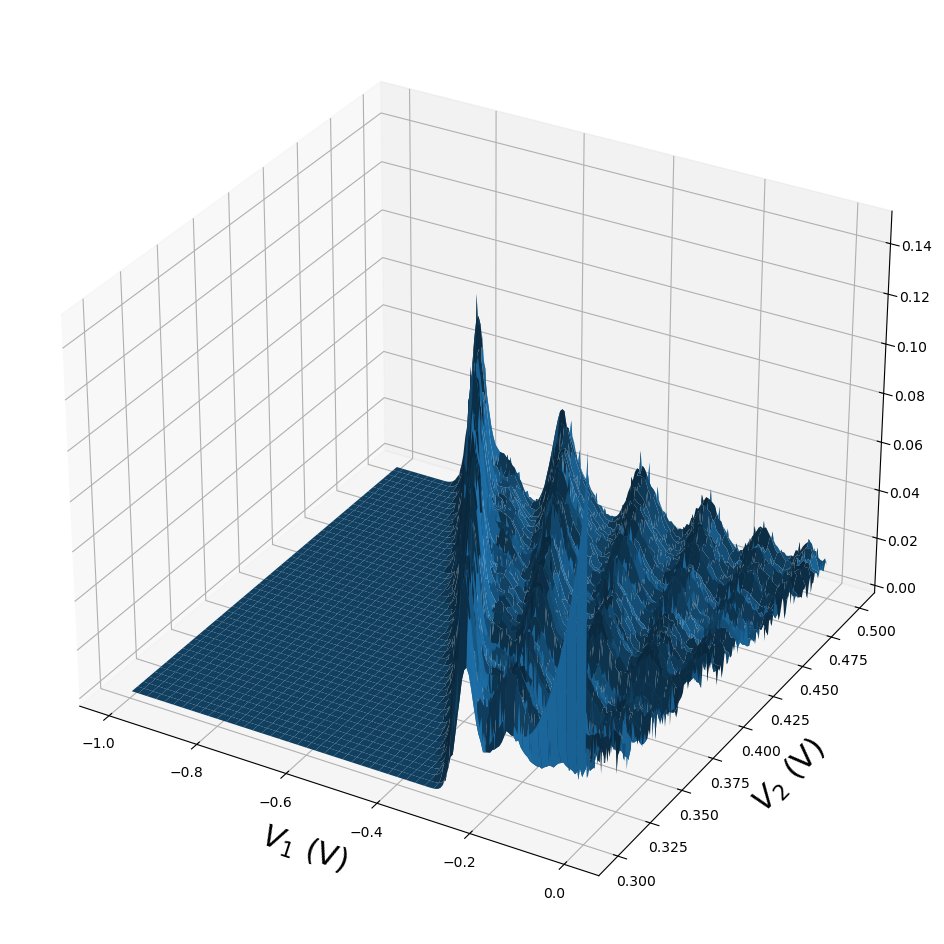

standard deviation (savgexpij), 10elev 100azim


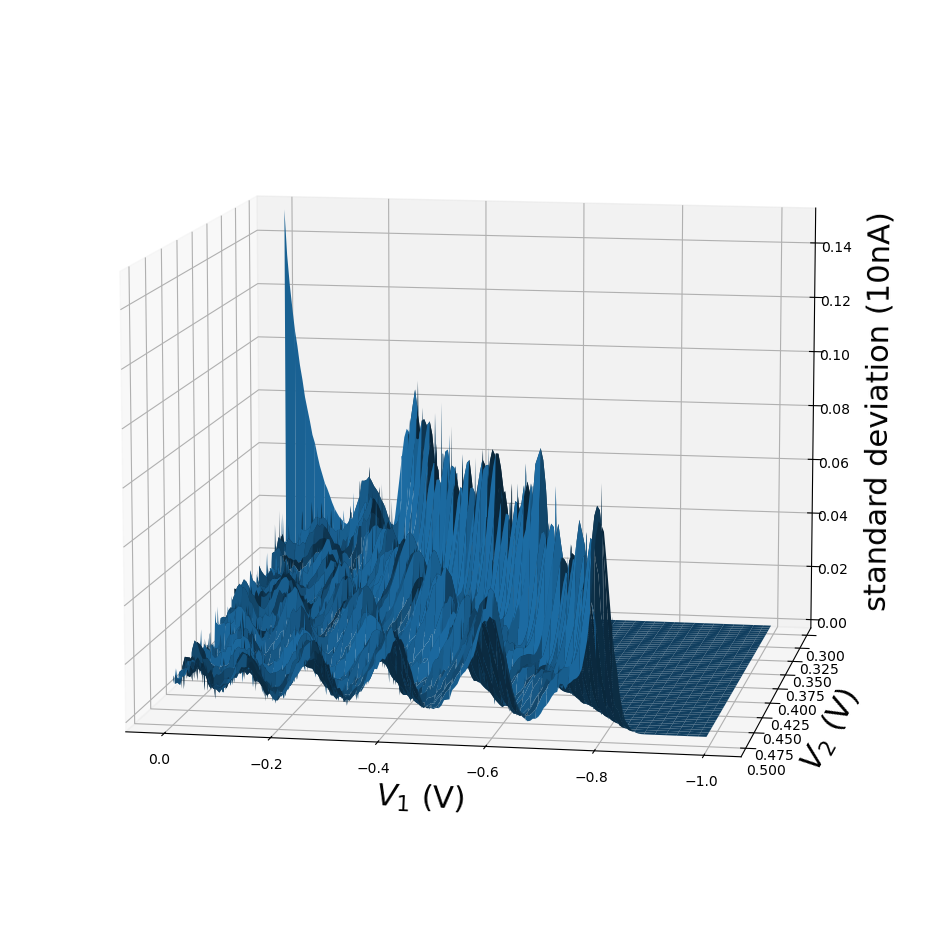

contour_rf
9.919501068990072e-08 0.14966503158983302
9.919501068990072e-08 0.14966503158983302


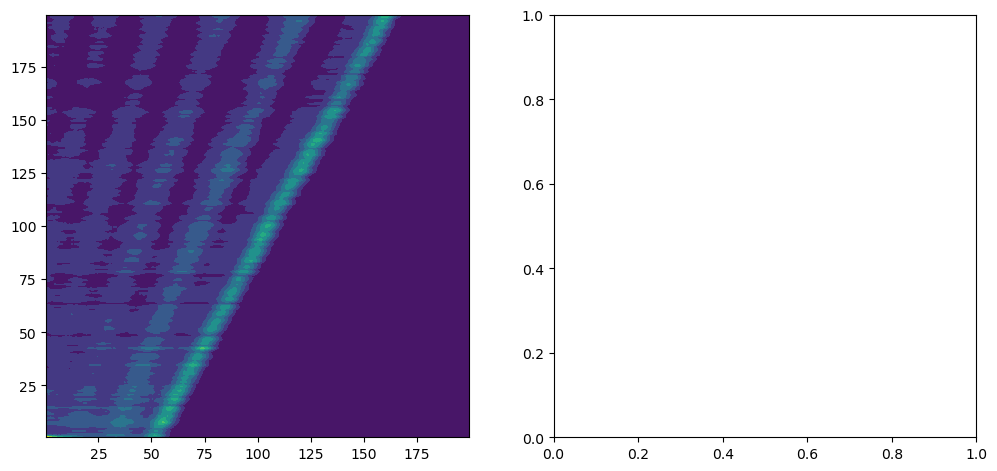

In [39]:
#smm
print('standard deviation (savgexpij), default')
fig = plt.figure(figsize=(12, 12))
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')
ax.plot_surface(B, D, savgexpij)
plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
ax.set_zlabel('standard deviation (10nA)', fontsize=22, rotation=0, labelpad=16)
plt.savefig('fig_sdev_' + str() + '.pdf')
plt.show()
plt.close()

print('standard deviation (savgexpij), 10elev 100azim')
fig = plt.figure(figsize=(12, 12))
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')
ax.plot_surface(B, D, savgexpij)
ax.view_init(elev=10., azim=100.)
plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
ax.set_zlabel('standard deviation (10nA)', fontsize=22, rotation=0, labelpad=16)
plt.savefig('fig_sdev2_10elev 100azim' + str() + '.pdf')
plt.show()
plt.close()


print('contour_rf')
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
ax1.set_aspect('equal', 'box')
ax2.set_aspect('equal', 'box')
amax = np.max(savgexpij)
amin = np.min(savgexpij)
print(amin, amax)
tmz = (amax-amin)/10.
ax1.contourf(savgexpij, levels=np.arange(amin, amax, tmz),
             extend='both', origin="lower")
amax = np.max(savgexpij)
amin = np.min(savgexpij)
print(amin, amax)
# tmz = (amax-amin)/10.
# ax2.contourf(st, levels=np.arange(amin, amax, tmz),
#              extend='both', origin="lower")
plt.savefig('fig_sdev_contour_' + str() + '.pdf')
# plt.show()
# plt.close()
# end = time.time()
# print(end - start, (end-start)/60.)

kNN 플롯

In [43]:
nuarray = np.zeros((20, 200, 200))
#for iexp in range(nexp):
for jter in range(20):
    fname_accum = r'/Users/namkim/testAI/data_knn(ts=0.3)/accum_'+str(jter)+'.npy'
    with open(fname_accum, 'rb') as afile:  #저장된 방식에 따라서 오픈해야함
        nu = np.load(afile)
        st = np.load(afile)
        nuarray[jter, :, :] = nu[:, :]
# print('nuarray[1, :3, :4]')
# print(nuarray[1, :3, :4])
# print('nuarray[2, :3, :4]')
# print(nuarray[2, :3, :4])
# print('nuarray[19, :3, :4]')
# print(nuarray[19, :3, :4])

surface_kNN_0.3ts (nuarray[19, :, :]), 10elev 100azim


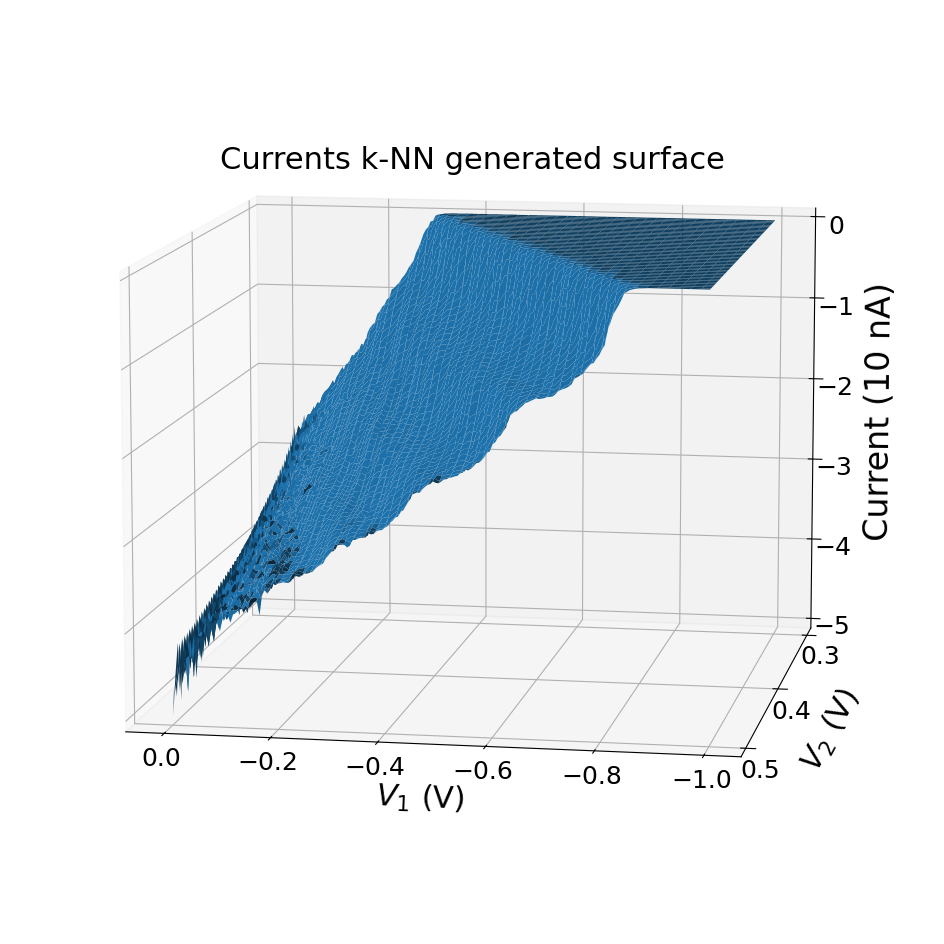

In [299]:

#selected for manuscript
# import matplotlib.pyplot as plt
# import numpy as np

print('surface_kNN_0.3ts (nuarray[19, :, :]), 10elev 100azim')
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(B, D, nuarray[19, :, :])
ax.view_init(elev=10., azim=100.)

plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
ax.set_zlabel('Current (10 nA)', fontsize=24, rotation=0, labelpad=16)
plt.title('Currents k-NN generated surface', 
          fontsize=22,        # Font size
          pad=0,            # Vertical spacing between title and plot (in points)
          y=0.9,           # Vertical position (1.0 is at the top of the plot)
          x=0.5)            

# Set y-axis tick frequency
#y_ticks = np.linspace(D.min(), D.max(), 2)
y_ticks = np.linspace(0.3, 0.5, 3)
ax.set_yticks(y_ticks)

# Adjust tick label size and pad
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.tick_params(axis='z', labelsize=18)
ax.xaxis.set_tick_params(pad=0)
ax.xaxis.labelpad = 10
ax.yaxis.set_tick_params(pad=0)
ax.yaxis.labelpad = 10

plt.savefig('fig_kNN_surface_10elev 100azim' + str() + '.pdf')
plt.show()
plt.close()

###



표준편차 kNN

평균 kNN ; nuavexp

nuavexp[:3,:4]
[[-3.47363744 -3.28494301 -2.98706741 -2.80625193]
 [-3.46447981 -3.2870812  -3.0068978  -2.85451485]
 [-3.47548823 -3.32341339 -3.03298785 -2.85394236]]
surface_kNN_0.3ts (nuavexp), 10elev 100azim


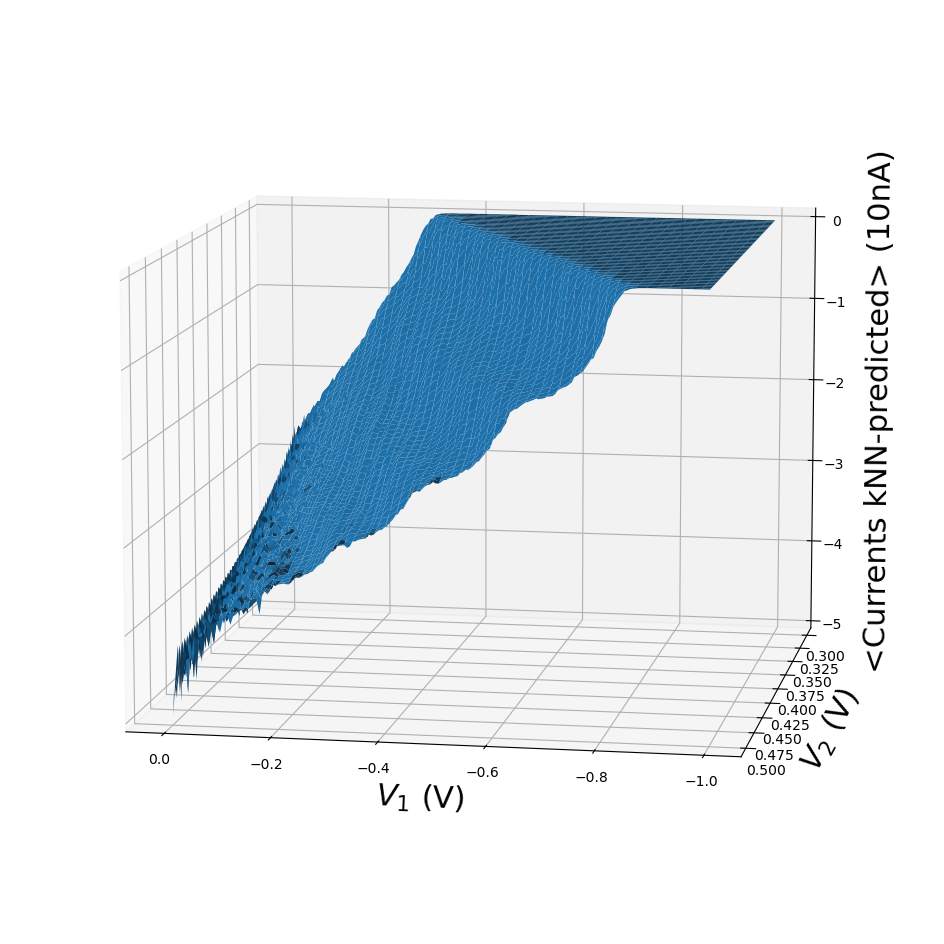

In [51]:

nuavexp = np.zeros((200, 200))
for i in range(200):
    for j in range(200):
        nuavexp[i, j] = sum(nuarray[:, i, j])/20
print('nuavexp[:3,:4]')
print(nuavexp[:3,:4])

print('surface_kNN_0.3ts (nuavexp), 10elev 100azim')
fig = plt.figure(figsize=(12, 12))
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')
ax.plot_surface(B, D, nuavexp[:, :])
ax.view_init(elev=10., azim=100.)
plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
ax.set_zlabel('<Currents kNN-predicted> (10nA)', fontsize=22, rotation=0, labelpad=16)
plt.savefig('fig_nuavexp2_' + str() + '.pdf')
plt.show()
plt.close()

표준편차 spm kNN-실측평균, nuarray[iexp, :, :]-zavgexpij[:, :]

In [53]:
tmp = np.zeros((20, 200, 200))
for iexp in range(20):
    tmp[iexp, :, :] = ((nuarray[iexp, :, :]-zavgexpij[:, :]))**2
spm = np.zeros((200, 200))
for i in range(200):
    for j in range(200):
        spm[i, j] = np.sqrt(sum(tmp[:, i, j])/20)
print('nuarray[1, :3, :4]')
print(nuarray[1, :3, :4])
print('zavgexpij[:3, :4]')
print(zavgexpij[:3, :4])

nuarray[1, :3, :4]
[[-3.38768834 -3.20902842 -2.92328648 -2.74794519]
 [-3.37899262 -3.21113399 -2.94404395 -2.79550348]
 [-3.3846469  -3.24691303 -2.97015785 -2.79558202]]
zavgexpij[:3, :4]
[[-2.902238   -2.8651195  -2.82351857 -2.78178457]
 [-3.26702886 -3.18293471 -3.11441893 -3.05159057]
 [-3.27528229 -3.19609814 -3.12560057 -3.06005757]]


standard deviation (spm), default


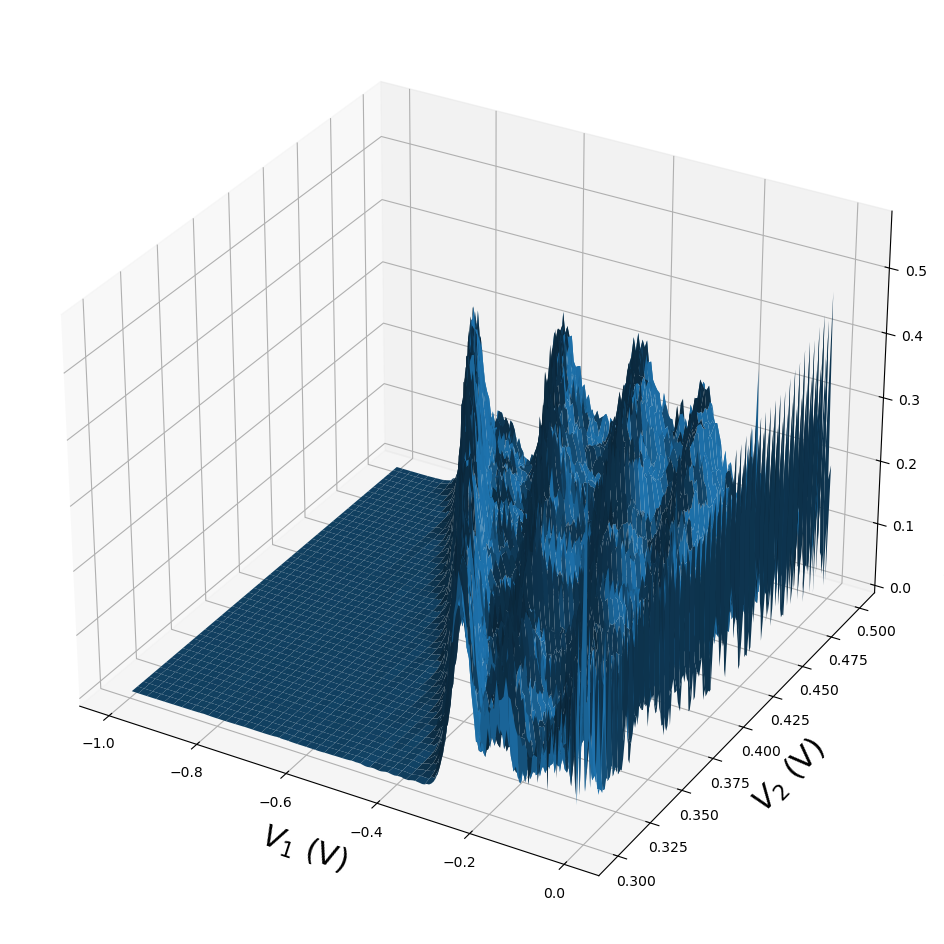

standard deviation (spm), 10elev 100azim


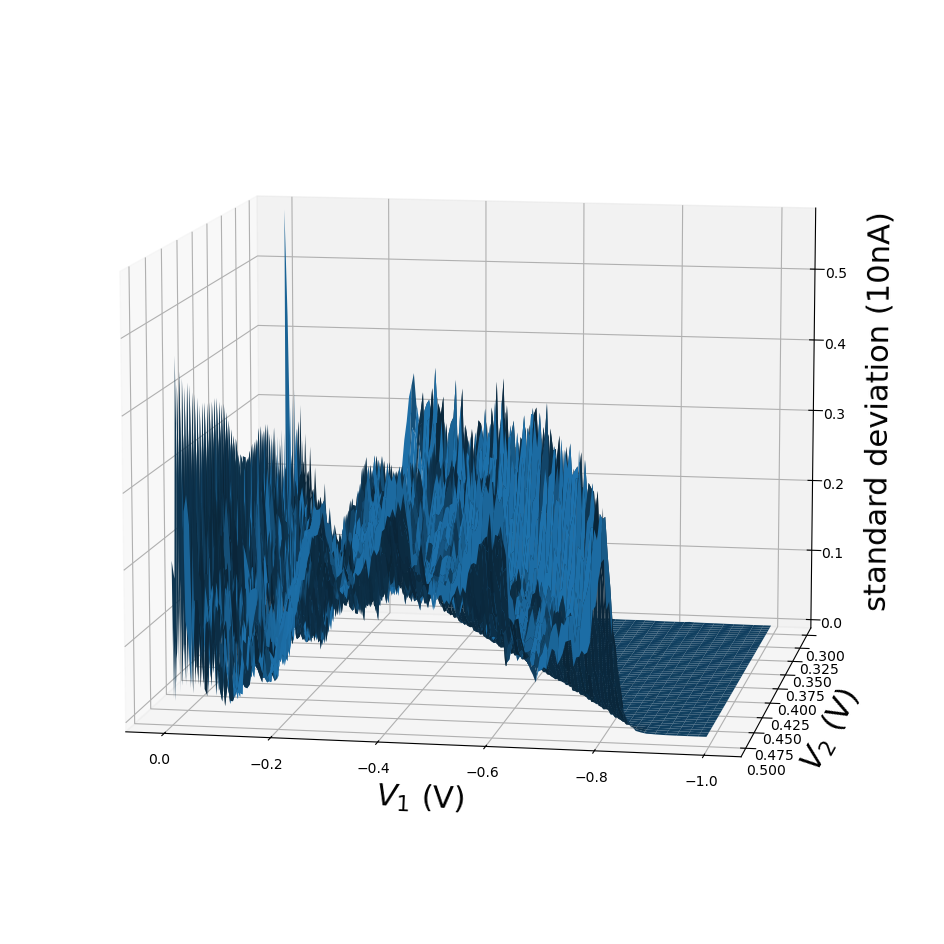

contour_rf(spm)
7.345666491955667e-06 0.5739806904161731
7.345666491955667e-06 0.5739806904161731


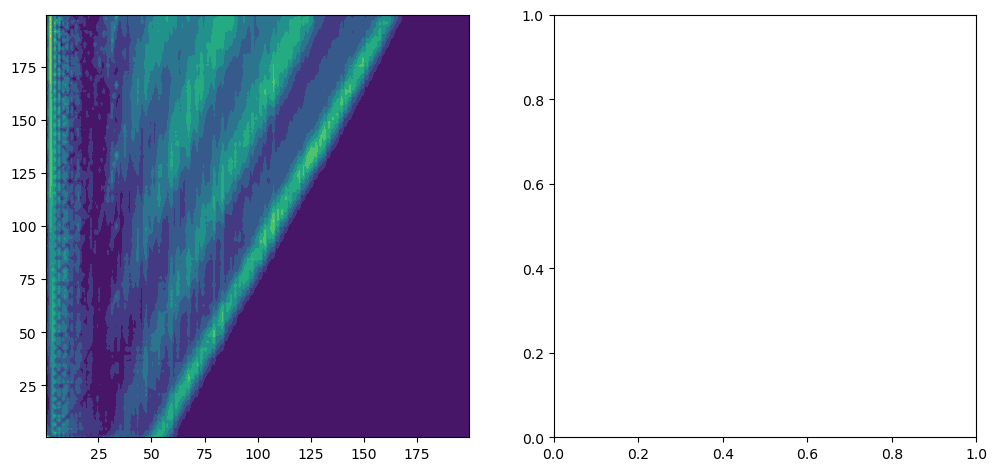

In [55]:
print('standard deviation (spm), default')
fig = plt.figure(figsize=(12, 12))
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')
ax.plot_surface(B, D, spm)
plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
ax.set_zlabel('standard deviation (10nA)', fontsize=22, rotation=0, labelpad=16)
plt.savefig('fig_spm_' + str() + '.pdf')
plt.show()
plt.close()

print('standard deviation (spm), 10elev 100azim')
fig = plt.figure(figsize=(12, 12))
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')
ax.plot_surface(B, D, spm)
ax.view_init(elev=10., azim=100.)
plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
ax.set_zlabel('standard deviation (10nA)', fontsize=22, rotation=0, labelpad=16)
plt.savefig('fig_spm2_' + str() + '.pdf')
plt.show()
plt.close()


print('contour_rf(spm)')
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
ax1.set_aspect('equal', 'box')
ax2.set_aspect('equal', 'box')
amax = np.max(spm)
amin = np.min(spm)
print(amin, amax)
tmz = (amax-amin)/10.
ax1.contourf(spm, levels=np.arange(amin, amax, tmz),
             extend='both', origin="lower")
amax = np.max(spm)
amin = np.min(spm)
print(amin, amax)
# tmz = (amax-amin)/10.
# ax2.contourf(st, levels=np.arange(amin, amax, tmz),
#              extend='both', origin="lower")
plt.savefig('fig_spm_contour_' + str(jter) + '.pdf')
# plt.show()
# plt.close()
# end = time.time()
# print(end - start, (end-start)/60.)

표준편차 spp KNN-평균KNN; nuarray[iexp, :, :]-nuavexp[:, :]

In [75]:
nuarray = np.zeros((20, 200, 200))
#for iexp in range(nexp):
for jter in range(20):
    fname_accum = r'/Users/namkim/testAI/data_knn(ts=0.3)/accum_'+str(jter)+'.npy'
    with open(fname_accum, 'rb') as afile:  #저장된 방식에 따라서 오픈해야함
        nu = np.load(afile)
        st = np.load(afile)
        nuarray[jter, :, :] = nu[:, :]
# print('nuarray[1, :3, :4]')
# print(nuarray[1, :3, :4])
# print('nuarray[2, :3, :4]')
# print(nuarray[2, :3, :4])
# print('nuarray[19, :3, :4]')
# print(nuarray[19, :3, :4])

In [77]:
nuavexp = np.zeros((200, 200))
for i in range(200):
    for j in range(200):
        nuavexp[i, j] = sum(nuarray[:, i, j])/20
# print('nuavexp[:3,:4]')
# print(nuavexp[:3,:4])

In [79]:
tmp = np.zeros((20, 200, 200))
for iexp in range(20):
    tmp[iexp, :, :] = ((nuarray[iexp, :, :]-nuavexp[:, :]))**2
spp = np.zeros((200, 200))
for i in range(200):
    for j in range(200):
        spp[i, j] = np.sqrt(sum(tmp[:, i, j])/20)
# print('spp[ :3, :4]')
# print(spp[ :3, :4])

standard deviation (spp), default


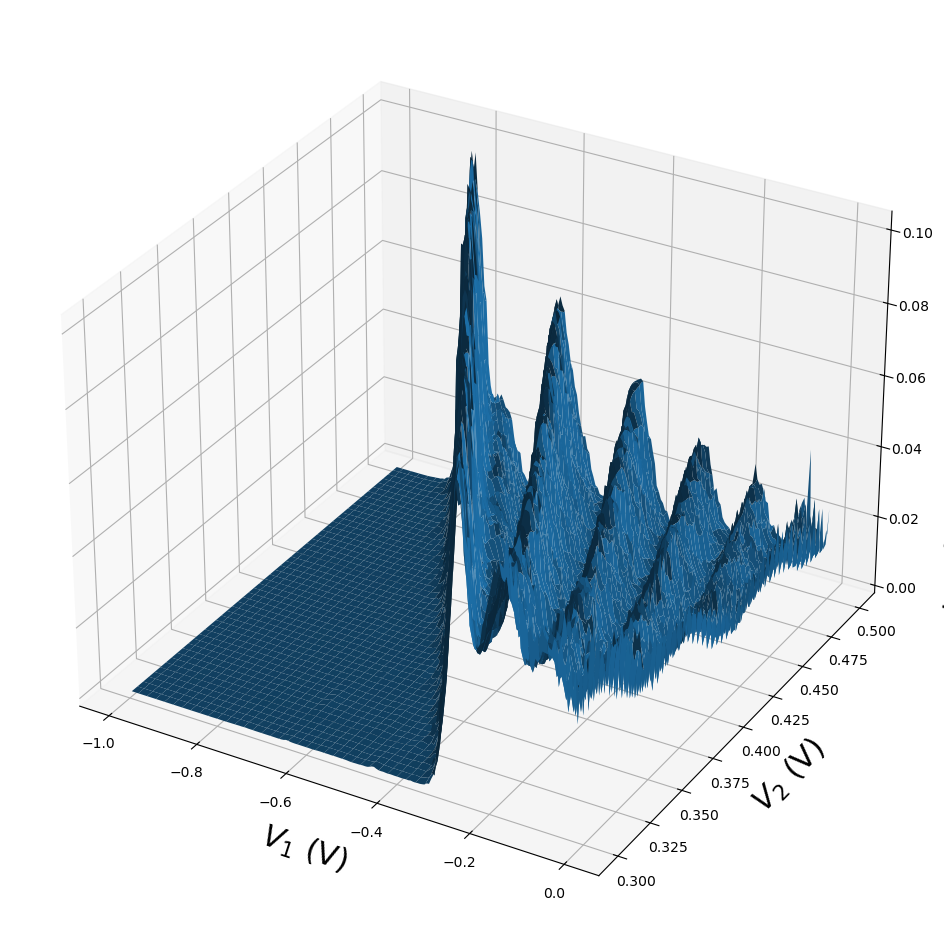

standard deviation (spp), 10elev 100azim


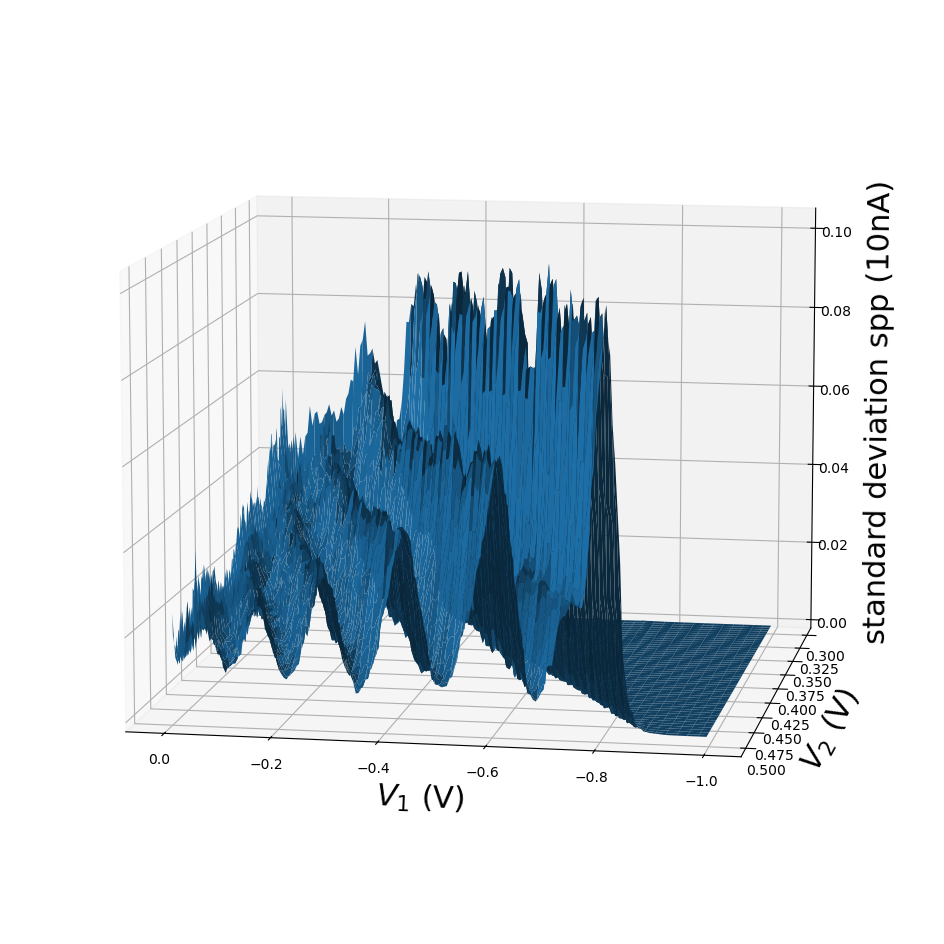

contour_rf(spp)
5.342353934133068e-06 0.10294785067102008
5.342353934133068e-06 0.10294785067102008


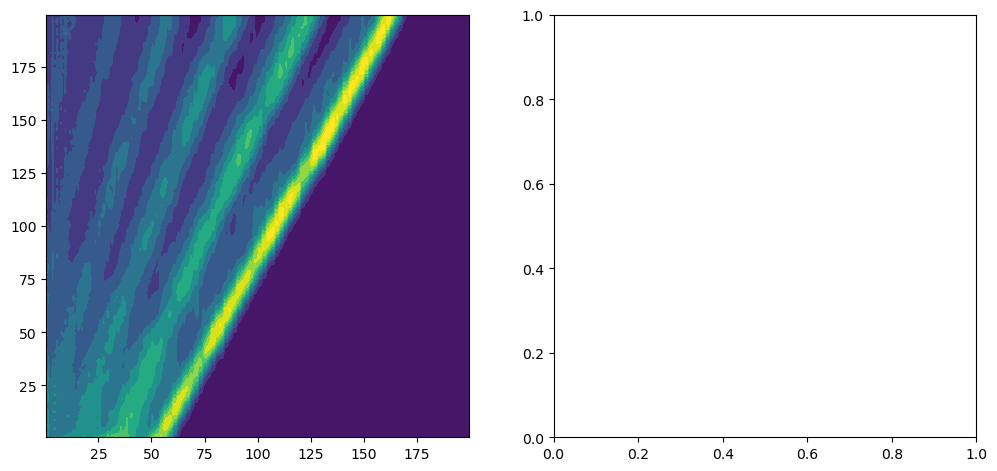

In [81]:
print('standard deviation (spp), default')
fig = plt.figure(figsize=(12, 12))
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')
ax.plot_surface(B, D, spp)
plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
ax.set_zlabel('standard deviation spp (10nA)', fontsize=22, rotation=0, labelpad=16)
plt.savefig('fig_spp_' + str() + '.pdf')
plt.show()
plt.close()

print('standard deviation (spp), 10elev 100azim')
fig = plt.figure(figsize=(12, 12))
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')
ax.plot_surface(B, D, spp)
ax.view_init(elev=10., azim=100.)
plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
ax.set_zlabel('standard deviation spp (10nA)', fontsize=22, rotation=0, labelpad=16)
plt.savefig('fig_spp2_' + str() + '.pdf')
plt.show()
plt.close()


print('contour_rf(spp)')
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
ax1.set_aspect('equal', 'box')
ax2.set_aspect('equal', 'box')
amax = np.max(spp)
amin = np.min(spp)
print(amin, amax)
tmz = (amax-amin)/10.
ax1.contourf(spp, levels=np.arange(amin, amax, tmz),
             extend='both', origin="lower")
amax = np.max(spp)
amin = np.min(spp)
print(amin, amax)
# tmz = (amax-amin)/10.
# ax2.contourf(st, levels=np.arange(amin, amax, tmz),
#              extend='both', origin="lower")
plt.savefig('fig_spp_contour_' + str() + '.pdf')
# plt.show()
# plt.close()
# end = time.time()
# print(end - start, (end-start)/60.)

슬라이스 2D 플롯

슬라이스 실측 average ; zavgexpij

In [85]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, ConstantKernel
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
import os
import shutil

In [87]:
nexp = 14
xyz = np.zeros((nexp, 200, 200))
for jter in range(nexp):
    fname_accum = '/Users/namkim/testAI/data_iv/data_' + str(jter+1) + '.txt'
    #fname_accum = 'data_iv_' + str(jter+1) + '.txt'
    x = []
    y = []
    z = []
    afile = open(fname_accum, 'r')
    for line in afile:
        y.append(float(line.split()[0]))
        x.append(float(line.split()[1]))
        z.append(float(line.split()[2]))
    afile.close()
    z = np.array(z)
    x = np.array(x)
    y = np.array(y)
    xx = np.zeros((200, 200))
    yy = np.zeros((200, 200))
    zz = np.zeros((200, 200))
    k = 0
    for i in range(200):
        for j in range(200):
            xx[i, j] = x[k]
            yy[i, j] = y[k]
            zz[i, j] = z[k]
            k = k+1
    if False:
        print(len(z))
    #xyz[jter, :, :] = xx[:, :]
    #xyz[jter, :, :] = yy[:, :]
    xyz[jter, :, :] = zz[:, :]
# print("모든 층의 처음 3x7 부분:")
# print(xyz[:, :3, :7])

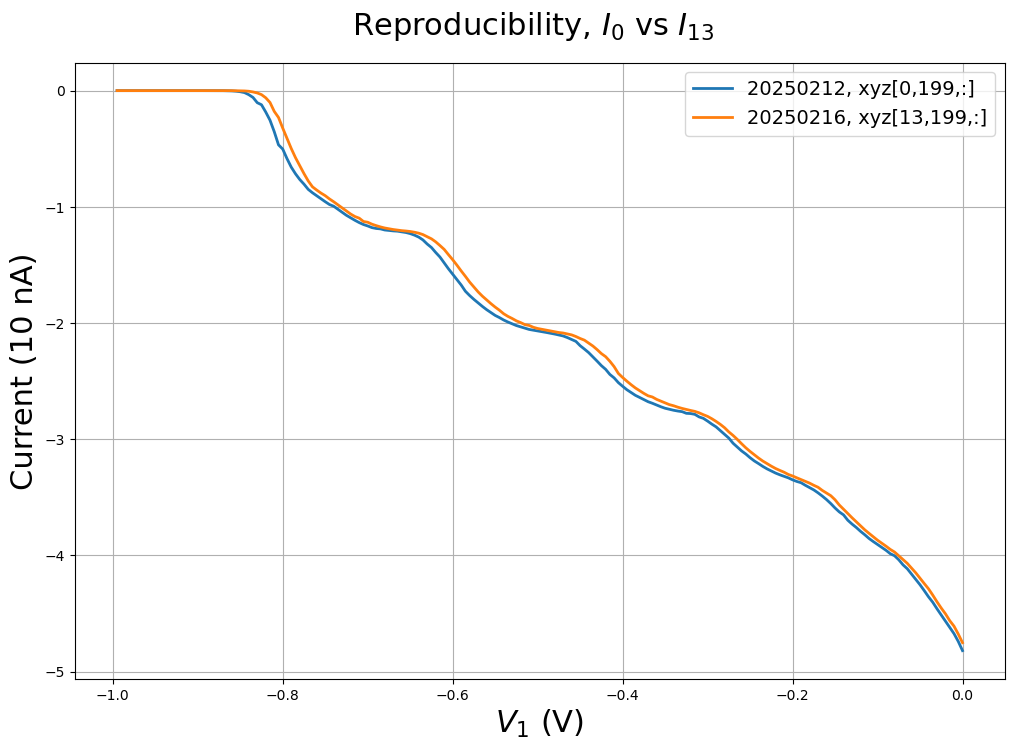

In [89]:
plt.figure(figsize=(12, 8))
plt.plot(B[0,:], xyz[0,199,:], linewidth=2,label='20250212, xyz[0,199,:]')  # Using B[0,:] as x-axis values
plt.plot(B[0,:], xyz[13,199,:], linewidth=2,label='20250216, xyz[13,199,:]')  # Using B[0,:] as x-axis values
# or if you want to use index as x-axis:
#plt.plot(range(200), xyz[2,199,:], linewidth=2)

plt.xlabel('$V_1$ (V)', fontsize=22)
plt.ylabel('Current (10 nA)', fontsize=22)
plt.grid(True)
plt.title(f'Reproducibility, $I_0$ vs $I_{{13}}$  ',fontsize=22, pad=20)
plt.legend(fontsize=14)
plt.savefig('fig_iv_reprod_0-13.pdf')
plt.show()
plt.close()

xyz[2,:,:]


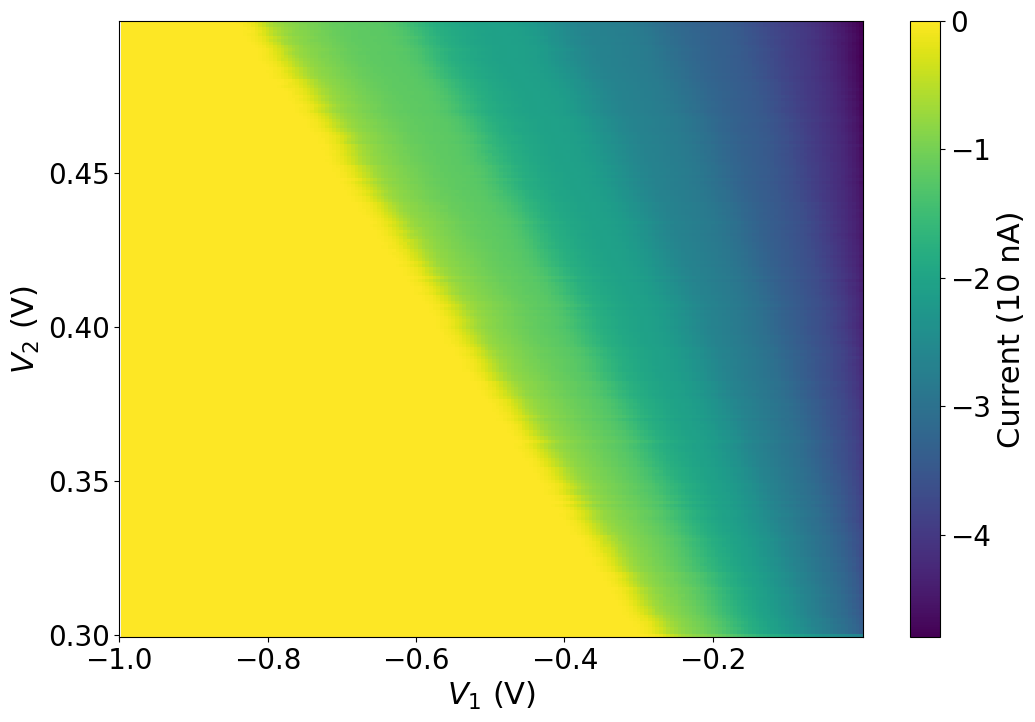

In [305]:
print('xyz[2,:,:]')
plt.figure(figsize=(12, 8))
plt.pcolormesh(B, D, xyz[2,:,:], shading='auto')
colorbar = plt.colorbar(label='Current (10nA)')

# Adjust colorbar label size
colorbar.set_label('Current (10 nA)', fontsize=22)
colorbar.ax.tick_params(labelsize=20)  # Colorbar tick label size

# Set title and axis labels
#plt.title(f'xyz[2,:,:]', fontsize=22, pad=20)
plt.xlabel('$V_1$ (V)', fontsize=22)
plt.ylabel('$V_2$ (V)', fontsize=22)

# Adjust tick frequency and size
plt.xticks(np.arange(-1.0, 0.0, 0.2))  # Change 0.2 to adjust x-axis tick frequency
plt.yticks(np.arange(0.3, 0.5, 0.05))  # Change 0.1 to adjust y-axis tick frequency

# Adjust tick label sizes
plt.tick_params(axis='both', which='major', labelsize=20)  # Change both x and y tick label sizes

# Optional: Rotate tick labels if needed
# plt.xticks(rotation=45)
# plt.yticks(rotation=45)

plt.savefig('fig_iv_2D_heatmap.pdf', bbox_inches='tight')  # Added bbox_inches='tight' to prevent label cutoff
plt.show()
plt.close()


슬라이스 실측 평균 & 표준편차  ; zavgexpij & varexpij

In [154]:
# Create array for averages
zavgexpij = np.zeros((200, 200))  # 2D array since we're averaging across experiments
nexp = 14

# Calculate average using sum()
for i in range(200):
    for j in range(200):
        zavgexpij[i, j] = sum(xyz[:, i, j])/nexp  # Using sum() instead of np.mean()

# print('\nzavgexpij array (first 3 rows x 4 columns):')
# print(zavgexpij[:3, :4])


In [97]:
tmp = np.zeros((nexp, 200, 200))
for iexp in range(nexp):
    tmp[iexp, :, :] = (xyz[iexp, :, :]-zavgexpij[:, :])**2
# print('tmp[:, :3, :4]')
# print(tmp[:, :3, :4])
varexpij = np.zeros((200, 200))
for i in range(200):
    for j in range(200):
        varexpij[i, j] = sum(tmp[:, i, j])/nexp
# print('varexpij[:3, :4]')
# print(varexpij[:3, :4])

In [101]:
nexp=14
tmp = np.zeros((nexp, 200, 200))
for iexp in range(3):
    tmp[iexp, :, :] = ((xyz[iexp, :, :]-zavgexpij[:, :]))**2
savgexpij = np.zeros((200, 200))
for i in range(200):
    for j in range(200):
        savgexpij[i, j] = np.sqrt(sum(tmp[:, i, j])/nexp)
# print('savgexpij[[:3,:4]')
# print(savgexpij[:3,:4])
# print('savgexpij[197:199,197:199]')
# print(savgexpij[197:199,197:199])

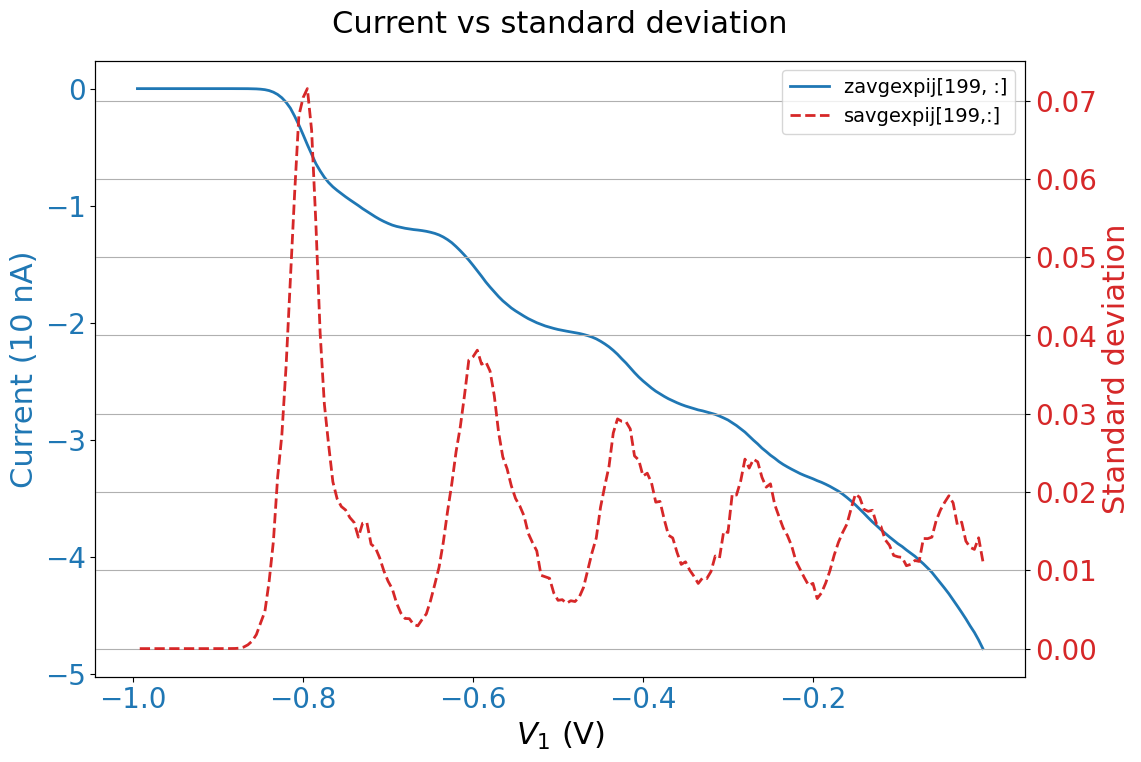

In [259]:
# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot xyz data on primary y-axis
plt.title(f'Current vs standard deviation', fontsize=22, pad=20)
color1 = 'tab:blue'
ax1.plot(B[0,:], zavgexpij[199, :], color=color1, linewidth=2, label='zavgexpij[199, :]')
ax1.set_xlabel('$V_1$ (V)', fontsize=22)
ax1.set_ylabel('Current (10 nA)', fontsize=22, color=color1)

# Adjust primary y-axis ticks
ax1.set_xticks(np.arange(-1.0, 0.0, 0.2))  # x-axis tick frequency
ax1.set_yticks(np.arange(-5.0, 0.1, 1))    # primary y-axis tick frequency
ax1.tick_params(axis='both', which='major', labelsize=20, labelcolor=color1)  # Adjust both axes label size

# Create secondary y-axis and plot savgexpij data
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.plot(B[0,:], savgexpij[199,:], color=color2, linewidth=2, linestyle='--', label='savgexpij[199,:]')
ax2.set_ylabel('Standard deviation', fontsize=22, color=color2)

# Adjust secondary y-axis ticks
ax2.set_yticks(np.arange(0, 0.07, 0.01))  # Adjust step size (0.01) for secondary y-axis frequency
ax2.tick_params(axis='y', labelsize=20, labelcolor=color2)  # Adjust secondary y-axis label size

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=14)

plt.grid(True)
plt.savefig('fig_zavg vs savg.pdf', bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
nu average;  nuavexp

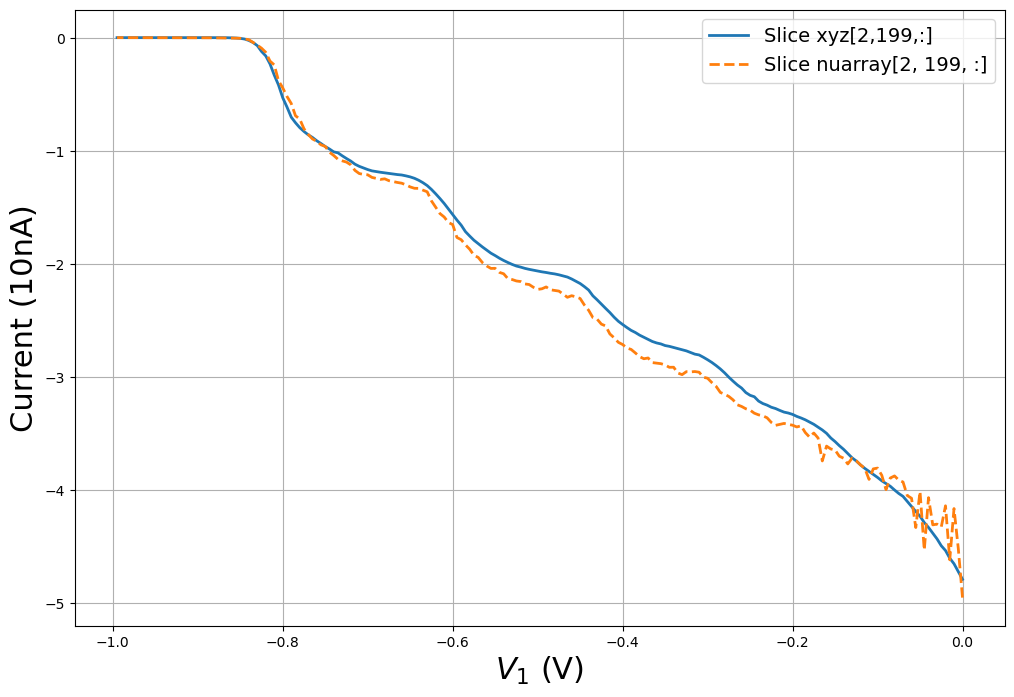

In [115]:
plt.figure(figsize=(12, 8))

# Plot both lines
plt.plot(B[0,:], xyz[2,199,:], linewidth=2, label='Slice xyz[2,199,:]')  
plt.plot(B[0,:], nuarray[2, 199, :], linewidth=2, label='Slice nuarray[2, 199, :]', linestyle='--')  # Using dashed line for second plot

plt.xlabel('$V_1$ (V)', fontsize=22)
plt.ylabel('Current (10nA)', fontsize=22)
plt.grid(True)
plt.legend(fontsize=14)  # Add legend to distinguish the lines
#plt.title(f'I(V2) curve at V1 = {V1_target}V')
#plt.savefig('fig_iv_2D_comparison.pdf')
plt.show()
plt.close()

In [109]:
nuarray = np.zeros((20, 200, 200))
#for iexp in range(nexp):
for jter in range(20):
    fname_accum = r'/Users/namkim/testAI/data_knn(ts=0.3)/accum_'+str(jter)+'.npy'
    with open(fname_accum, 'rb') as afile:  #저장된 방식에 따라서 오픈해야함
        nu = np.load(afile)
        st = np.load(afile)
        nuarray[jter, :, :] = nu[:, :]
# print('nuarray[1, :3, :4]')
# print(nuarray[1, :3, :4])
# print('nuarray[2, :3, :4]')
# print(nuarray[2, :3, :4])
# print('nuarray[19, :3, :4]')
# print(nuarray[19, :3, :4])

In [113]:
nuavexp = np.zeros((200, 200))
for i in range(200):
    for j in range(200):
        nuavexp[i, j] = sum(nuarray[:, i, j])/20
# print('nuavexp[:3,:4]')
# print(nuavexp[:3,:4])

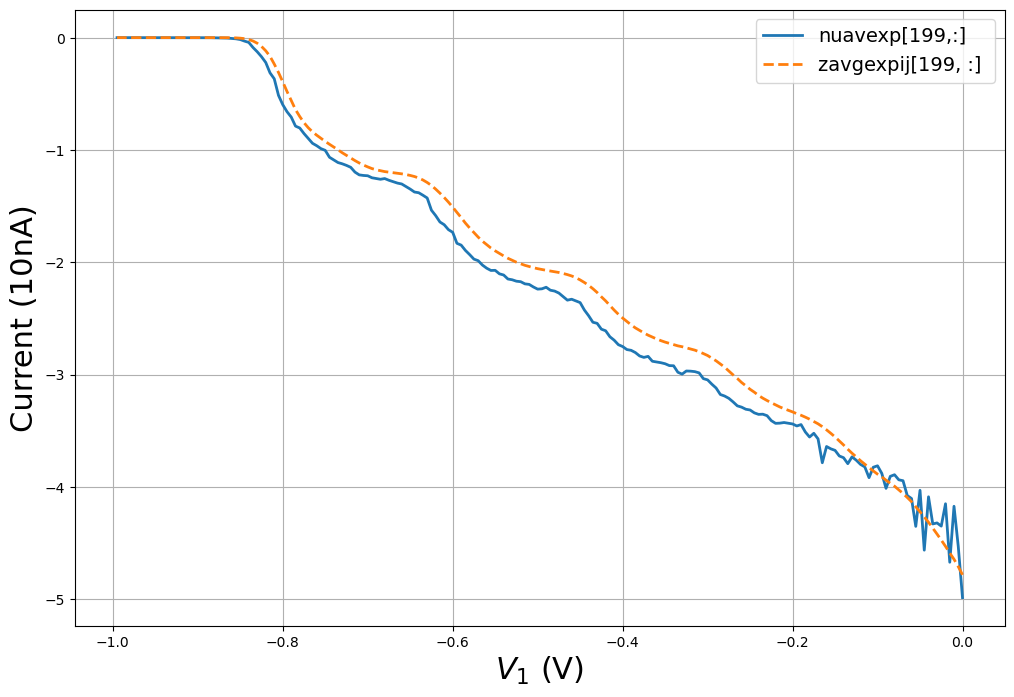

In [117]:
plt.figure(figsize=(12, 8))

# Plot both lines
plt.plot(B[0,:], nuavexp[199,:], linewidth=2, label='nuavexp[199,:]')  # Using dashed line for second plot
plt.plot(B[0,:], zavgexpij[199, :] , linewidth=2, label='zavgexpij[199, :] ', linestyle='--')  

plt.xlabel('$V_1$ (V)', fontsize=22)
plt.ylabel('Current (10nA)', fontsize=22)
plt.grid(True)
plt.legend(fontsize=14)  # Add legend to distinguish the lines
plt.savefig('fig_comparison_zav-nuav.pdf')
plt.show()
plt.close()

 표준편차 kNN-평균 kNN ;  spp, nuarray[iexp, :, :]-nuavexp[:, :])

In [121]:
nuavexp = np.zeros((200, 200))
for i in range(200):
    for j in range(200):
        nuavexp[i, j] = sum(nuarray[:, i, j])/20
# print('nuavexp[:3,:4]')
# print(nuavexp[:3,:4])

In [125]:
tmp = np.zeros((20, 200, 200))
for iexp in range(20):
    tmp[iexp, :, :] = ((nuarray[iexp, :, :]-nuavexp[:, :]))**2
spp = np.zeros((200, 200))
for i in range(200):
    for j in range(200):
        spp[i, j] = np.sqrt(sum(tmp[:, i, j])/20)
# print('spp[ :3, :4]')
# print(spp[ :3, :4])

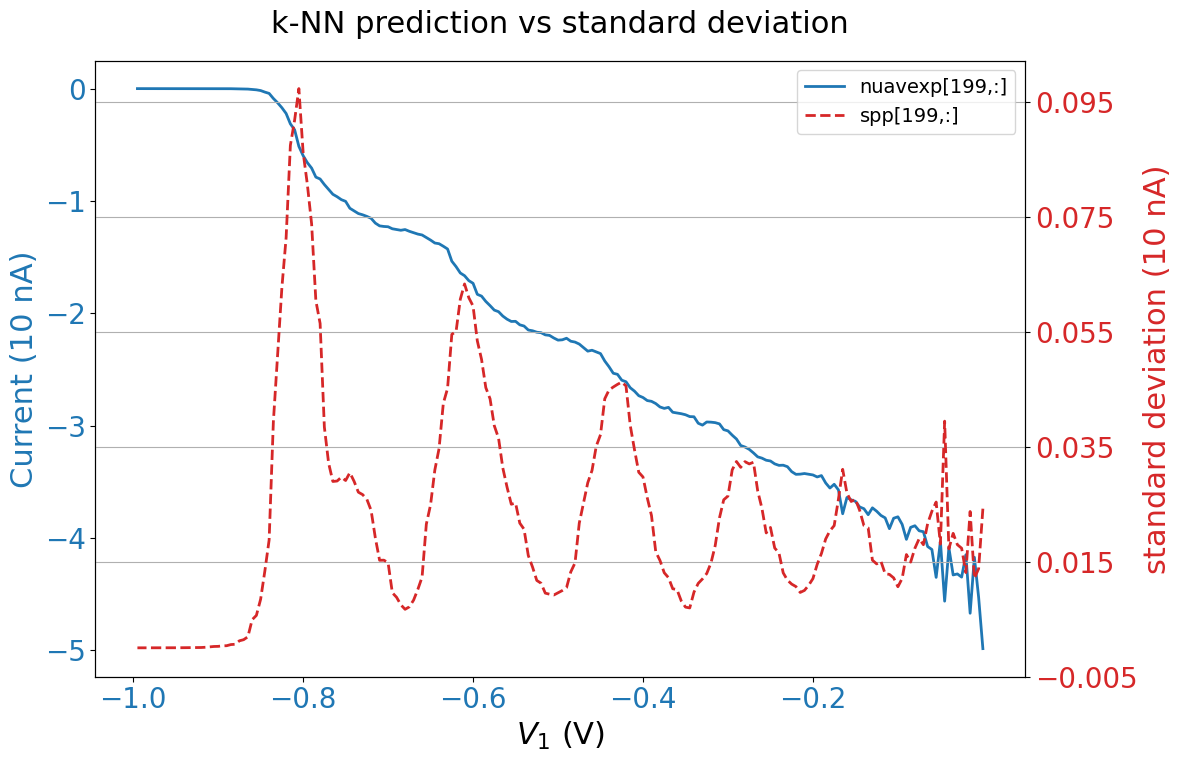

In [263]:
# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot xyz data on primary y-axis
plt.title(f'k-NN prediction vs standard deviation', fontsize=22, pad=20)
color1 = 'tab:blue'
ax1.plot(B[0,:], nuavexp[199,:], color=color1, linewidth=2, label='nuavexp[199,:]')
ax1.set_xlabel('$V_1$ (V)', fontsize=22)
ax1.set_ylabel('Current (10 nA)', fontsize=22, color=color1)

# Adjust primary y-axis ticks
ax1.set_xticks(np.arange(-1.0, 0.0, 0.2))  # x-axis tick frequency
ax1.set_yticks(np.arange(-5.0, 0.1, 1))    # primary y-axis tick frequency
ax1.tick_params(axis='both', which='major', labelsize=20, labelcolor=color1)  # Adjust both axes label size

# Create secondary y-axis and plot savgexpij data
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.plot(B[0,:], spp[199,:], color=color2, linewidth=2, linestyle='--', label='spp[199,:]')
ax2.set_ylabel('standard deviation (10 nA)', fontsize=22, color=color2)

# Adjust secondary y-axis ticks
ax2.set_yticks(np.arange(-0.005, 0.1, 0.02))  # Adjust step size (0.01) for secondary y-axis frequency
ax2.tick_params(axis='y', labelsize=20, labelcolor=color2)  # Adjust secondary y-axis label size

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=14)

plt.grid(True)
plt.savefig('fig_nuavexp vs spp.pdf', bbox_inches='tight')
plt.show()
plt.close()

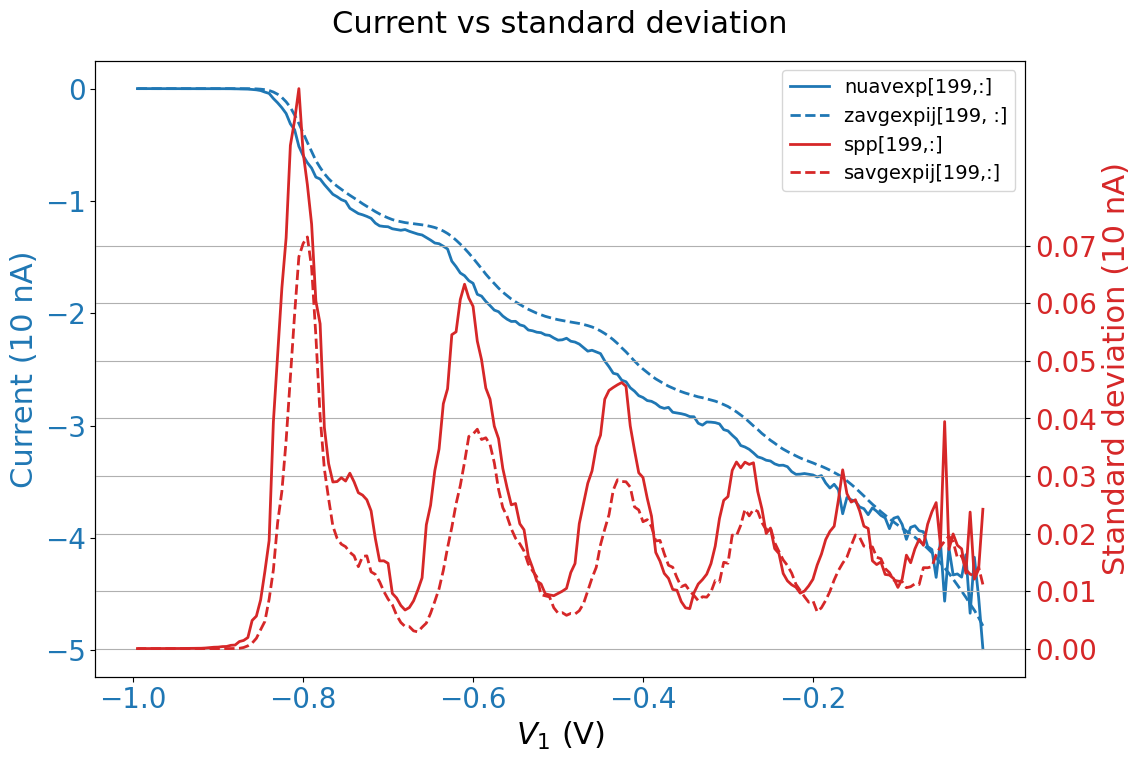

In [279]:
# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot xyz data on primary y-axis
plt.title(f'Current vs standard deviation', fontsize=22, pad=20)
color1 = 'tab:blue'
ax1.plot(B[0,:], nuavexp[199,:], color=color1, linewidth=2, label='nuavexp[199,:]')
ax1.plot(B[0,:], zavgexpij[199, :], color=color1, linewidth=2, linestyle='--', label='zavgexpij[199, :]')
ax1.set_xlabel('$V_1$ (V)', fontsize=22)
ax1.set_ylabel('Current (10 nA)', fontsize=22, color=color1)

# Adjust primary y-axis ticks
ax1.set_xticks(np.arange(-1.0, 0.0, 0.2))  # x-axis tick frequency
ax1.set_yticks(np.arange(-5.0, 0.1, 1))    # primary y-axis tick frequency
ax1.tick_params(axis='both', which='major', labelsize=20, labelcolor=color1)  # Adjust both axes label size

# Create secondary y-axis and plot savgexpij data
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.plot(B[0,:], spp[199,:], color=color2, linewidth=2,  label='spp[199,:]')
ax2.plot(B[0,:], savgexpij[199,:], color=color2, linewidth=2, linestyle='--', label='savgexpij[199,:]')
ax2.set_ylabel('Standard deviation (10 nA)', fontsize=22, color=color2)

# Adjust secondary y-axis ticks
ax2.set_yticks(np.arange(0, 0.07, 0.01))  # Adjust step size (0.01) for secondary y-axis frequency
ax2.tick_params(axis='y', labelsize=20, labelcolor=color2)  # Adjust secondary y-axis label size

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=14)

plt.grid(True)
plt.savefig('fig_current and standard deviation.pdf', bbox_inches='tight')
plt.show()
plt.close()

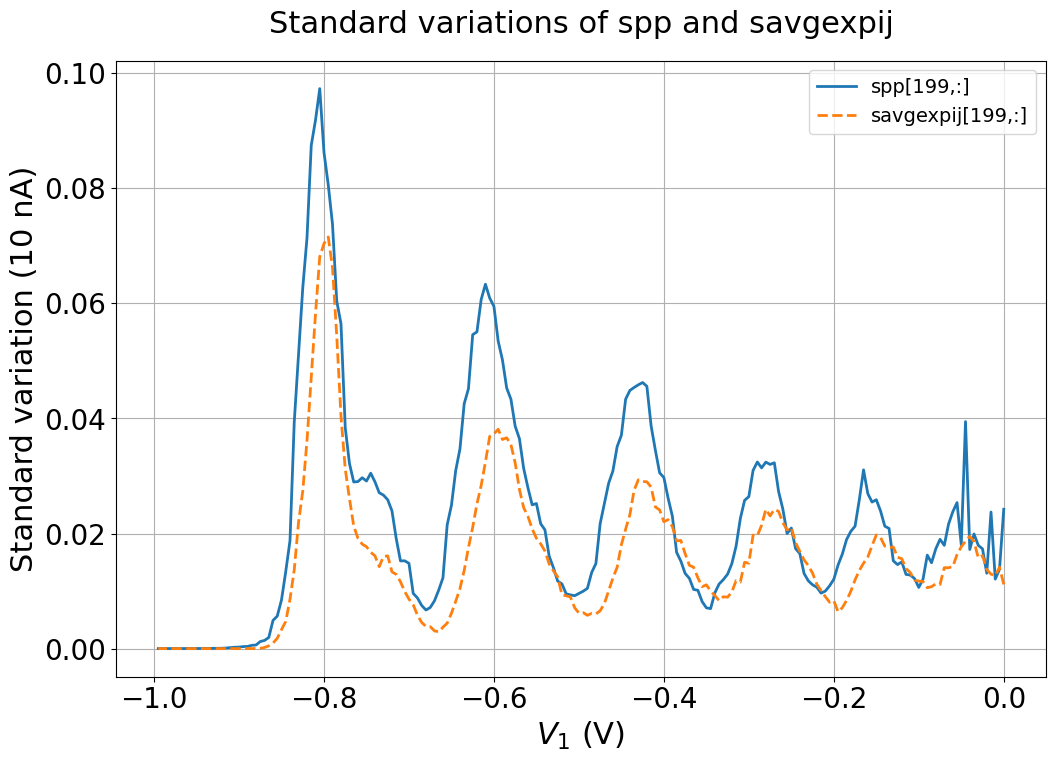

In [233]:
plt.figure(figsize=(12, 8))

# Plot both lines
plt.plot(B[0,:], spp[199,:], linewidth=2, label='spp[199,:]')  
plt.plot(B[0,:], savgexpij[199,:], linewidth=2, label='savgexpij[199,:]', linestyle='--')

# Set axis labels
plt.xlabel('$V_1$ (V)', fontsize=22)
plt.ylabel('Standard variation (10 nA)', fontsize=22)
plt.title('Standard variations of spp and savgexpij',fontsize=22, pad=20)

# Adjust tick frequency
plt.xticks(np.arange(-1.0, 0.1, 0.2))  # Adjust x-axis tick frequency (change 0.2 for different spacing)
plt.yticks(np.arange(0, 0.11, 0.02))  # Adjust y-axis tick frequency (change 0.01 for different spacing)

# Adjust tick label sizes
plt.tick_params(axis='both', which='major', labelsize=20)  # Change both x and y tick label sizes

# Add grid and legend
plt.grid(True)
plt.legend(fontsize=14, loc='best')  # Add legend with adjustable font size

# Save and show plot
#plt.savefig('fig_spp vs savg.pdf', bbox_inches='tight')  # Added bbox_inches to prevent label cutoff
plt.show()
plt.close()

nuarray[2, :, :]


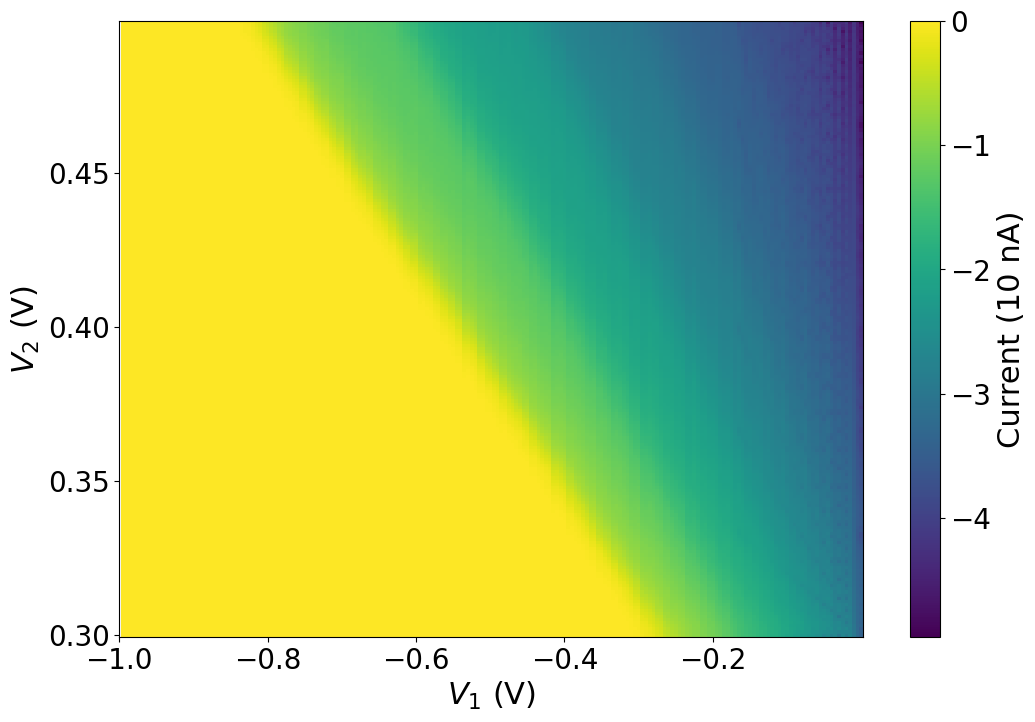

In [317]:
print('nuarray[2, :, :]')
plt.figure(figsize=(12, 8))
plt.pcolormesh(B, D, nuarray[2, :, :], shading='auto')
colorbar = plt.colorbar(label='Current (10nA)')

# Adjust colorbar label size
colorbar.set_label('Current (10 nA)', fontsize=22)
colorbar.ax.tick_params(labelsize=20)  # Colorbar tick label size

# Set title and axis labels
#plt.title(f'nuarray[2, :, :]', fontsize=22, pad=20)
plt.xlabel('$V_1$ (V)', fontsize=22)
plt.ylabel('$V_2$ (V)', fontsize=22)

# Adjust tick frequency and size
plt.xticks(np.arange(-1.0, 0.0, 0.2))  # Change 0.2 to adjust x-axis tick frequency
plt.yticks(np.arange(0.3, 0.5, 0.05))  # Change 0.1 to adjust y-axis tick frequency

# Adjust tick label sizes
plt.tick_params(axis='both', which='major', labelsize=20)  # Change both x and y tick label sizes

# Optional: Rotate tick labels if needed
# plt.xticks(rotation=45)
# plt.yticks(rotation=45)

plt.savefig('fig_nu-kNN_2D_heatmap.pdf', bbox_inches='tight')  # Added bbox_inches='tight' to prevent label cutoff
plt.show()
plt.close()

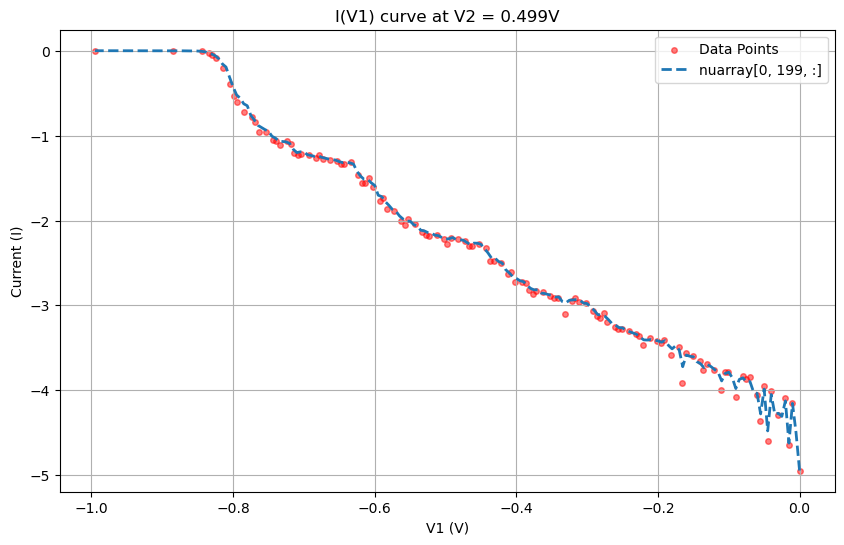

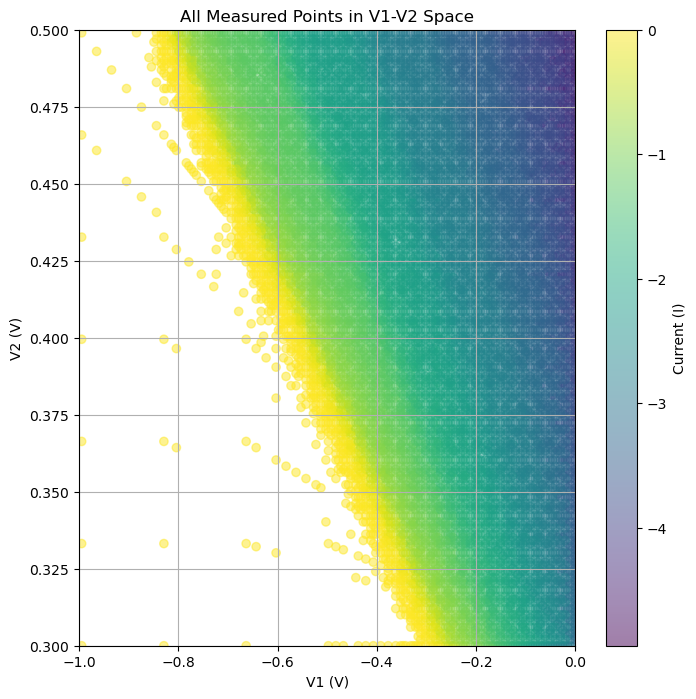

Total number of data points: 9309
Number of points used for I(V1) curve: 120
V1 range: -0.995 to 0.000
V2 range: 0.300 to 0.499


In [135]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Your original data loading code
nexp = 1
all_V1 = []  # List to store V1 from all experiments
all_V2 = []  # List to store V2 from all experiments
all_I = []   # List to store I from all experiments

for jter in range(nexp):
    fname_accum = '/Users/namkim/testAI/data_knn(ts=0.3)/accum_' + str(jter) + '.txt'
    V1 = []
    V2 = []
    I = []
    kount = 0
    
    with open(fname_accum, 'r') as afile:
        for line in afile:
            values = line.split()
            V1.append(float(values[0]))
            V2.append(float(values[1]))
            I.append(float(values[2]))
            kount = kount + 1
    
    # Convert to numpy arrays and extend our lists
    all_V1.extend(np.array(V1))
    all_V2.extend(np.array(V2))
    all_I.extend(np.array(I))

# Convert accumulated data to numpy arrays
V1_data = np.array(all_V1)
V2_data = np.array(all_V2)
I_data = np.array(all_I)

# Select a specific V2 value to plot I(V1)
V2_target = 0.499  # You can change this to any value between 0.3 and 0.5

# Find points close to our target V2 value
tolerance = 0.001  # Adjust this value based on your data density
mask = np.abs(V2_data - V2_target) < tolerance

# Extract corresponding V1 and I values
V1_plot = V1_data[mask]
I_plot = I_data[mask]

# Sort points for plotting
sort_idx = np.argsort(V1_plot)
V1_plot = V1_plot[sort_idx]
I_plot = I_plot[sort_idx]

# Create interpolated curve
#V1_interp = np.linspace(-1.0, 0, 1000)  # Using your V1 range
#I_interp = np.interp(V1_interp, V1_plot, I_plot)

# Plotting
plt.figure(figsize=(10, 6))
#plt.scatter(V1_plot, I_plot, color='red', label='Data Points', alpha=0.5)
plt.scatter(V1_plot, I_plot, color='red', label='Data Points', alpha=0.5, s=16, marker='o')  # circles
#plt.plot(B[0,:], nuavexp[199,:], linewidth=2, label='nuavexp[199,:]',linestyle='--')  # Using dashed line for second plot
plt.plot(B[0,:], nuarray[0, 199, :], linewidth=2, label='nuarray[0, 199, :]', linestyle='--') 
#plt.plot(V1_interp, I_interp, 'b-', label='Interpolated I(V1)')
plt.xlabel('V1 (V)')
plt.ylabel('Current (I)')
plt.title(f'I(V1) curve at V2 = {V2_target}V')
plt.legend()
plt.grid(True)
#plt.savefig('fig_accum_0.pdf')
plt.show()



# Plot the distribution of all points in V1-V2 space
plt.figure(figsize=(8, 8))
plt.scatter(V1_data, V2_data, c=I_data, cmap='viridis', alpha=0.5)
plt.colorbar(label='Current (I)')
plt.xlabel('V1 (V)')
plt.ylabel('V2 (V)')
plt.title('All Measured Points in V1-V2 Space')
plt.grid(True)
plt.xlim(-1.0, 0)    # Your V1 range
plt.ylim(0.3, 0.5)   # Your V2 range
plt.show()

# Print some statistics
print(f"Total number of data points: {len(V1_data)}")
print(f"Number of points used for I(V1) curve: {len(V1_plot)}")
print(f"V1 range: {V1_data.min():.3f} to {V1_data.max():.3f}")
print(f"V2 range: {V2_data.min():.3f} to {V2_data.max():.3f}")

[-3.54056686e+00 -3.90135521e+00 -4.18791962e+00 ... -2.02310687e-02
 -2.95691739e-03 -2.33945879e-02]
9577


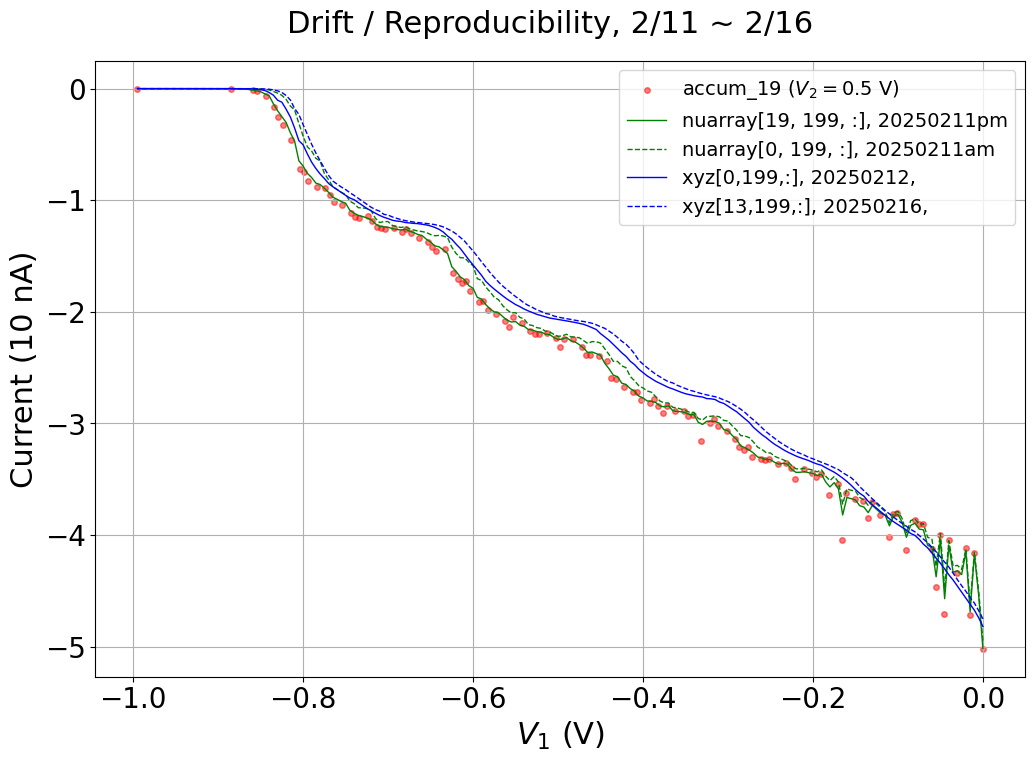

Total number of data points: 9577
Number of points used for I(V1) curve: 122
V1 range: -0.995 to 0.000
V2 range: 0.300 to 0.499


In [319]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# # Your original data loading code
# nexp = 1
# all_V1 = []  # List to store V1 from all experiments
# all_V2 = []  # List to store V2 from all experiments
# all_I = []   # List to store I from all experiments

# for jter in range(nexp):
#     fname_accum = '/Users/namkim/testAI/data_knn(ts=0.3)/accum_' + str(jter) + '.txt'
#     V1 = []
#     V2 = []
#     I = []
#     kount = 0


# Your original data loading code
nexp = 1
all_V1 = []  # List to store V1 from all experiments
all_V2 = []  # List to store V2 from all experiments
all_I = []   # List to store I from all experiments

#for jter in range(nexp):
fname_accum = '/Users/namkim/testAI/data_knn(ts=0.3)/accum_19.txt'
V1 = []
V2 = []
I = []
kount = 0


with open(fname_accum, 'r') as afile:
    for line in afile:
        values = line.split()
        V1.append(float(values[0]))
        V2.append(float(values[1]))
        I.append(float(values[2]))
        kount = kount + 1

# Convert to numpy arrays and extend our lists
all_V1.extend(np.array(V1))
all_V2.extend(np.array(V2))
all_I.extend(np.array(I))


# Convert accumulated data to numpy arrays
V1_data = np.array(all_V1)
V2_data = np.array(all_V2)
I_data = np.array(all_I)
print(I_data)
print(len(I_data))

# Select a specific V2 value to plot I(V1)
V2_target = 0.499  # You can change this to any value between 0.3 and 0.5

# Find points close to our target V2 value
tolerance = 0.001  # Adjust this value based on your data density
mask = np.abs(V2_data - V2_target) < tolerance

# Extract corresponding V1 and I values
V1_plot = V1_data[mask]
I_plot = I_data[mask]

# Sort points for plotting
sort_idx = np.argsort(V1_plot)
V1_plot = V1_plot[sort_idx]
I_plot = I_plot[sort_idx]





#plotting
plt.figure(figsize=(12, 8))

# Plot both lines
plt.scatter(V1_plot, I_plot, color='red', label='accum_19 ($V_2=0.5$ V)', alpha=0.5, s=16, marker='o')  # circles
plt.plot(B[0,:], nuarray[19, 199, :], linewidth=1, color='green', label='nuarray[19, 199, :], 20250211pm') 
plt.plot(B[0,:], nuarray[0, 199, :], linewidth=1, color='green', label='nuarray[0, 199, :], 20250211am', linestyle='--') 
plt.plot(B[0,:], xyz[0,199,:], linewidth=1, color='blue',label='xyz[0,199,:], 20250212, ')  # Using B[0,:] as x-axis values
plt.plot(B[0,:], xyz[13,199,:], linewidth=1, color='blue', label='xyz[13,199,:], 20250216,', linestyle='--')  # Using B[0,:] as x-axis values

# Adjust tick frequency
plt.xticks(np.arange(-1.0, 0.1, 0.2))  # Adjust x-axis tick frequency (change 0.2 for different spacing)
plt.yticks(np.arange(-5.0, 0.05, 1))  # Adjust y-axis tick frequency (change 0.01 for different spacing)

# Adjust tick label sizes
plt.tick_params(axis='both', which='major', labelsize=20)  # Change both x and y tick label sizes


plt.xlabel('$V_1$ (V)', fontsize=22)
plt.ylabel('Current (10 nA)', fontsize=22)
plt.grid(True)
plt.legend(fontsize=14)  # Add legend to distinguish the lines
plt.title(f'Drift / Reproducibility, 2/11 ~ 2/16  ',fontsize=22, pad=20)
plt.savefig('fig_time drift-reprod.pdf')
plt.show()
plt.close()

# Print some statistics
print(f"Total number of data points: {len(V1_data)}")
print(f"Number of points used for I(V1) curve: {len(V1_plot)}")
print(f"V1 range: {V1_data.min():.3f} to {V1_data.max():.3f}")
print(f"V2 range: {V2_data.min():.3f} to {V2_data.max():.3f}")